In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
dataset = pd.read_csv("C:\\Users\\Star\\Desktop\\Github code\\food delivery costs.csv")
dataset.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2/1/2024 1:11,2/1/2024 2:39,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2/2/2024 22:11,2/2/2024 22:46,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,1/31/2024 5:54,1/31/2024 6:52,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,1/16/2024 22:52,1/16/2024 23:38,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,1/29/2024 1:19,1/29/2024 2:48,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [31]:
dataset.describe()

,Order ID,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,1053.969000,28.620000,126.99000,29.832000,28.300000
std,288.819436,530.975339,16.958278,43.06405,11.627165,49.614228
min,1.000000,104.000000,0.000000,50.00000,10.000000,0.000000
25%,250.750000,597.750000,20.000000,90.00000,20.000000,0.000000
50%,500.500000,1038.500000,30.000000,127.00000,30.000000,0.000000
75%,750.250000,1494.000000,40.000000,164.00000,40.000000,50.000000
max,1000.000000,1995.000000,50.000000,200.00000,50.000000,150.000000


In [32]:
dataset.isnull().sum()

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64

In [33]:
dataset['Discounts and Offers'].unique()

array(['5% on App', '10%', '15% New User', nan, '50 off Promo'],
      dtype=object)

In [34]:
dataset['Discounts and Offers'] = dataset['Discounts and Offers']. fillna('0')

In [35]:
dataset.isnull().sum()

Order ID                  0
Customer ID               0
Restaurant ID             0
Order Date and Time       0
Delivery Date and Time    0
Order Value               0
Delivery Fee              0
Payment Method            0
Discounts and Offers      0
Commission Fee            0
Payment Processing Fee    0
Refunds/Chargebacks       0
dtype: int64

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    1000 non-null   object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [37]:
num_rows, num_columns = dataset.shape
print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')


Number of rows: 1000
Number of columns: 12


In [38]:
dataset['Order Date and Time'] = pd.to_datetime(dataset['Order Date and Time'])


In [39]:
order_counts= dataset.groupby('Order Date and Time').size()
print(order_counts)

Order Date and Time
2024-01-01 02:12:00    1
2024-01-01 02:58:00    1
2024-01-01 03:21:00    1
2024-01-01 05:01:00    1
2024-01-01 05:27:00    1
                      ..
2024-02-07 19:42:00    1
2024-02-07 20:23:00    1
2024-02-07 21:19:00    1
2024-02-07 22:23:00    1
2024-02-07 23:56:00    1
Length: 994, dtype: int64


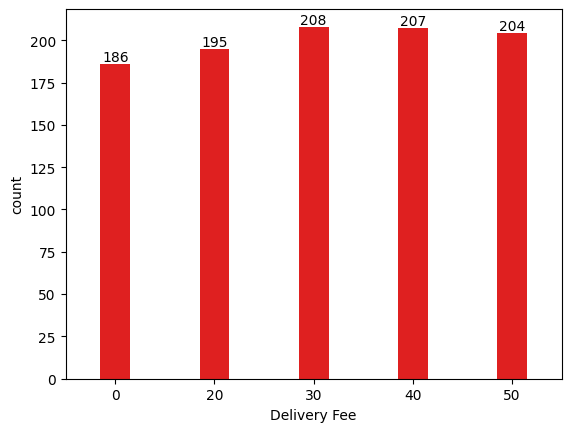

In [41]:
ax = sns.countplot(x='Delivery Fee', data= dataset, width=0.3, color="r")
ax.bar_label(ax.containers[0])
plt.show()

In [47]:
discount_summary = dataset.groupby('Discounts and Offers')['Order Value'].sum().reset_index()


In [48]:
discount_summary = discount_summary.dropna()


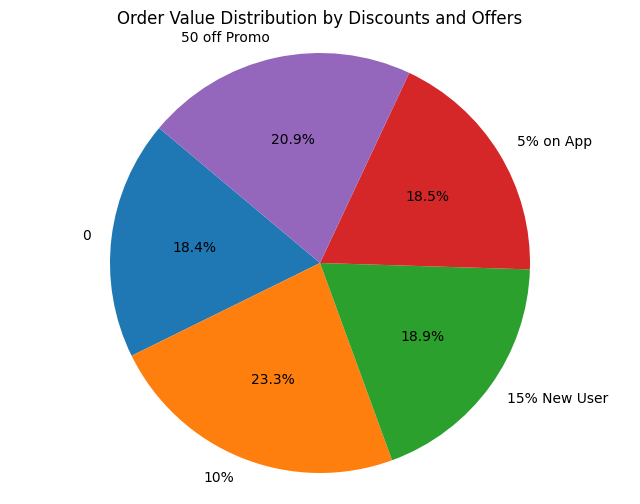

In [49]:
plt.figure(figsize=(8, 6))
plt.pie(discount_summary['Order Value'], labels=discount_summary['Discounts and Offers'], autopct='%1.1f%%', startangle=140)
plt.title('Order Value Distribution by Discounts and Offers')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

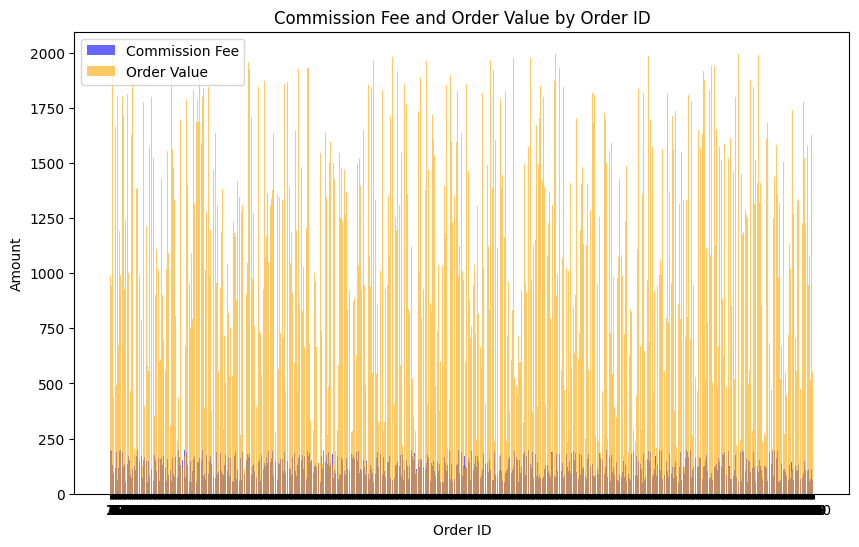

In [54]:
plt.figure(figsize=(10, 6))
plt.bar(dataset['Order ID'], dataset['Commission Fee'], label='Commission Fee', color='blue', alpha=0.6)
plt.bar(dataset['Order ID'], dataset['Order Value'], label='Order Value', color='orange', alpha=0.6)
plt.xlabel('Order ID')
plt.ylabel('Amount')
plt.title('Commission Fee and Order Value by Order ID')
plt.legend()
plt.xticks(dataset['Order ID'])
plt.show()

In [59]:
payment_method_mapping = {method: idx for idx, method in enumerate(dataset['Payment Method'].unique())}
dataset['Payment Method Encoded'] = dataset['Payment Method'].map(payment_method_mapping)



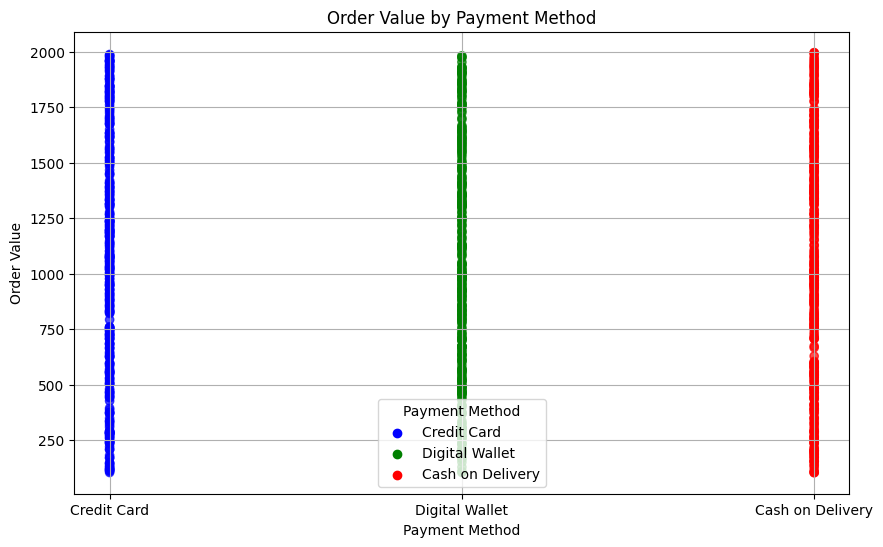

In [60]:
# Assign colors to each payment method
colors = ['blue', 'green', 'red']  # You can adjust or add more colors as needed
dataset['Color'] = dataset['Payment Method'].map(lambda x: colors[payment_method_mapping[x]])

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(dataset['Payment Method Encoded'], dataset['Order Value'], color=dataset['Color'], alpha=0.7)

# Adding labels and title
plt.xticks(ticks=list(payment_method_mapping.values()), labels=list(payment_method_mapping.keys()))
plt.xlabel('Payment Method')
plt.ylabel('Order Value')
plt.title('Order Value by Payment Method')
plt.grid()

# Create a legend
legend_labels = payment_method_mapping.keys()
for color, label in zip(colors, legend_labels):
    plt.scatter([], [], color=color, label=label)
plt.legend(title='Payment Method')

plt.show()